# Parameter Learning

In [1]:
using RDatasets
using PGFPlots
using Distributions

┌ Info: Recompiling stale cache file /Users/shushmanchoudhury/.julia/compiled/v0.7/PGFPlots/XxINN.ji for PGFPlots [3b7a836e-365b-5785-a47d-02c71176b4aa]
└ @ Base loading.jl:1185


## Maximum likelihood parameter learning

In [2]:
D = dataset("datasets", "iris")

,SepalLength,SepalWidth,PetalLength,PetalWidth,Species
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa
4,4.6,3.1,1.5,0.2,setosa
5,5.0,3.6,1.4,0.2,setosa
6,5.4,3.9,1.7,0.4,setosa
7,4.6,3.4,1.4,0.3,setosa
8,5.0,3.4,1.5,0.2,setosa
9,4.4,2.9,1.4,0.2,setosa
10,4.9,3.1,1.5,0.1,setosa


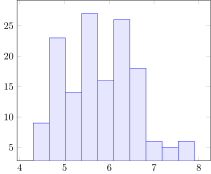

In [3]:
d = D[:SepalLength]
Plots.Histogram(d)

In [4]:
dist = fit_mle(Normal, d)
g = Axis([
    Plots.Histogram(d, density=true),
    Plots.Linear(x->pdf(dist,x), (4,8))
]
)
display(g)
display(dist)

LoadError: function Tuple does not accept keyword arguments

## Bayesian parameter learning

In [5]:
# small helper function for plotting Beta distributions
PGFPlots.plot(d::Beta) = plot(x->pdf(d, x), (0,1));

In [6]:
prior = Beta(6,2)
plot(prior)

LoadError: function Tuple does not accept keyword arguments

In [7]:
prior

Beta{Float64}(α=6.0, β=2.0)

In [8]:
posterior(d::Beta, x) = Beta(d.α + sum(x .== 1), d.β + sum(x .== 0))

posterior (generic function with 1 method)

In [9]:
# The posterior function is provided by distributions.jl
post = posterior(prior, [0, 0, 1])

Beta{Float64}(α=7.0, β=4.0)

In [10]:
plot(post)

LoadError: function Tuple does not accept keyword arguments

## Nonparametric parameter learning

In [11]:
bandwith = 0.2
# kernel
K(x) = pdf(Normal(0,bandwith), x)
# nonparametric density function
p(x) = sum([K(x - o) for o in d])/length(d)
# plot result, comparing with histogram
g = Axis([
    Plots.Histogram(d, density=true, bins=30),
    Plots.Linear(p, (4,8))
])

LoadError: function Tuple does not accept keyword arguments

In [13]:
bandwidths = [0.01, 0.1, 0.2, 0.5]
gp = GroupPlot(2,2)
for bandwidth in bandwidths
    # kernel
    local K(x) = pdf(Normal(0,bandwidth), x)
    # nonparametric density function
    local p(x) = sum([K(x - o) for o in d])/length(d)
    # plot result, comparing with histogram
    g = Axis([
        Plots.Histogram(d, density=true, bins=30),
        Plots.Linear(p, (4,8))
        ], title = bandwidth)
    push!(gp, g)
end
gp

LoadError: function Tuple does not accept keyword arguments